#  AQI -Air Quality Index (as per City)

## 1. Load dataset and read the dataset
-> import library\
-> load dataset\
-> reading as per data

In [1]:
#pip install pandas-profiling
#pip install tabulate
from sklearn.impute import KNNImputer
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
DeprecationWarning("ignore")
FutureWarning("ignore")

FutureWarning('ignore')

In [2]:
df=pd.read_csv("city_day.csv")

In [3]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
# creating a visualization report of raw data to get a quick view of dataset.
#city_day=ProfileReport(df,title="city_day")
#city_day.to_file(output_file="city_day.html")

## Reading:

City_day data is having lots of null values ranging somewhere around 18.7% missing cells along with the majority of continuous variables with high correlation with AQI.It has no duplicate rows.









## 2. Data cleaning and processing

-fill the null values by appropriate method.\
-refine the data to perform EDA.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
#null values columns in data
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

 To fill the null values.(calculate the correlation of null values with AQI first)

In [7]:
var = df.select_dtypes(np.float64).columns  # since the datatype of null values column is float

In [8]:
#defining function to calculate AQI
corrl=[]
def cor(x):
    a=df["AQI"].corr(x)
    return corrl.append(a)

In [9]:
cor(df["PM2.5"])
cor(df["PM10"])
cor(df["NO"])
cor(df["NO2"])
cor(df["NOx"])
cor(df["NH3"])
cor(df["CO"])
cor(df["SO2"])
cor(df["O3"])
cor(df["Benzene"])
cor(df["Toluene"])
cor(df["Xylene"])

In [10]:
# create table to show values clearly.
from tabulate import tabulate
table=[var,corrl]
print(tabulate({"Variable":var,"Correaltion":corrl},headers=["Variable","Correlation"]))

Variable      Correlation
----------  -------------
PM2.5           0.659181
PM10            0.803313
NO              0.452191
NO2             0.537071
NOx             0.48645
NH3             0.252019
CO              0.683346
SO2             0.490586
O3              0.198991
Benzene         0.0444067
Toluene         0.279992
Xylene          0.165532
AQI


Since, most of the vaiable is having good correlation,so drpoing the value is not a good option.

In [11]:
# It is better to fill the values through unbiased method(to prevent from making the data bias.)
# select the numerical variables to apply KNN.
var=[col for col in df.columns if df[col].dtypes !="O"]
var

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

In [12]:
imputer=KNNImputer(n_neighbors=5,weights="distance")    # imputing knn by setting weights as distance instaed of uniform.
imputer.fit(df[var])

KNNImputer(weights='distance')

In [13]:
dc=pd.DataFrame(imputer.transform(df[var]))

In [14]:
dc.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [15]:
#setting columns name
dc.columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene','AQI']

In [16]:
# Now,adding other columns to dataset  
dc["City"]=df["City"]
dc["Date"]=df["Date"]

In [17]:
# Re-indexing the columns.
column_names=['Date','City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene',"AQI"]
dc=dc.reindex(columns=column_names)

In [18]:
dc

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,120.025927
1,2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,130.791651
2,2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,344.272735
3,2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,146.963405
4,2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,390.145889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.000000
29527,2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.000000
29528,2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.000000
29529,2020-06-30,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.000000


### AQI Calculation
Since, for calculating AQI ("The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3."),it has been
defined by the authorities to calculate the AQI.SO, we will be calculating AQI(with respect to these columns) and 
filling the AQI bucket.

In [142]:
# importing the file created alreday
from form import form_aqi

In [145]:
calling=form_aqi()

In [146]:
#calculating AQI
dc["AQI_calculated"] = round(dc[["PM2.5", "PM10", "SO2", "NOx",
                                 "NH3", "CO", "O3"]].max(axis = 1))
# setting AQI bucket
dc["AQI_bucket"] = dc["AQI_calculated"].apply(lambda x: calling.get_AQI_bucket(x))

KeyError: "None of [Index(['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3'], dtype='object')] are in the [columns]"

In [22]:
dc

,Date,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_calculated,AQI_bucket
0,2015-01-01,Ahmedabad,25.338390,137.843241,0.92,18.22,17.15,10.058427,0.92,27.64,133.36,0.00,0.02,0.00,120.025927,138.0,Moderate
1,2015-01-02,Ahmedabad,25.568675,144.263876,0.97,15.69,16.46,9.723427,0.97,24.55,34.06,3.68,5.50,3.77,130.791651,144.0,Moderate
2,2015-01-03,Ahmedabad,115.057620,165.891366,17.40,19.30,29.70,8.948120,17.40,29.07,30.70,6.80,16.40,2.25,344.272735,166.0,Moderate
3,2015-01-04,Ahmedabad,39.372665,184.350858,1.70,18.48,17.97,11.393357,1.70,18.59,36.08,4.43,10.14,1.00,146.963405,184.0,Moderate
4,2015-01-05,Ahmedabad,158.694621,216.522624,22.10,21.42,37.76,9.030260,22.10,39.33,39.31,7.01,18.89,2.78,390.145889,217.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,41.000000,51.0,Satisfactory
29527,2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,70.000000,74.0,Satisfactory
29528,2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,68.000000,66.0,Satisfactory
29529,2020-06-30,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,54.000000,50.0,Good


In [23]:
dc.drop(["AQI"],axis=1,inplace=True) #drop old AQI,since 2 columns are there.


In [24]:
dc.rename(columns = {'AQI_calculated':'AQI'}, inplace = True) #renaming name
dc=dc.round(2) #doing round off.

In [25]:
dc=dc.set_index(dc["Date"]).drop("Date",1)  #setting date as index


In [26]:
dc

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00,138.0,Moderate
2015-01-02,Ahmedabad,25.57,144.26,0.97,15.69,16.46,9.72,0.97,24.55,34.06,3.68,5.50,3.77,144.0,Moderate
2015-01-03,Ahmedabad,115.06,165.89,17.40,19.30,29.70,8.95,17.40,29.07,30.70,6.80,16.40,2.25,166.0,Moderate
2015-01-04,Ahmedabad,39.37,184.35,1.70,18.48,17.97,11.39,1.70,18.59,36.08,4.43,10.14,1.00,184.0,Moderate
2015-01-05,Ahmedabad,158.69,216.52,22.10,21.42,37.76,9.03,22.10,39.33,39.31,7.01,18.89,2.78,217.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,51.0,Satisfactory
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,74.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,66.0,Satisfactory


In [27]:
dc.to_csv(r"D:\python_lectures\Techstack/City.csv")   #saving clean data as new data

In [28]:
df=pd.read_csv("City.csv",index_col="Date",parse_dates=True).sort_values(by = ['Date', 'City']) #reading new data

In [29]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00,138.0,Moderate
2015-01-01,Bengaluru,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07,38.0,Good
2015-01-01,Chennai,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00,59.0,Satisfactory
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,608.0,Severe
2015-01-01,Lucknow,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00,170.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,Patna,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,25.76,1.73,5.50,2.14,58.0,Satisfactory
2020-07-01,Shillong,16.70,29.40,0.97,2.70,1.04,2.66,0.10,4.29,17.71,0.00,0.02,0.00,29.0,Good
2020-07-01,Talcher,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,0.00,0.00,57.0,Satisfactory


Now, our data is clean and feature engineering ends here.

## EDA: 
EDA is one of the important step of a model,to get the visualization of the data, we can go through the dasboard attached with this.

## Analysis

After the whole process, we can answer some of the questions from the above dataset.
Let's answer the question drawn from the above datasets.

<AxesSubplot:ylabel='City'>

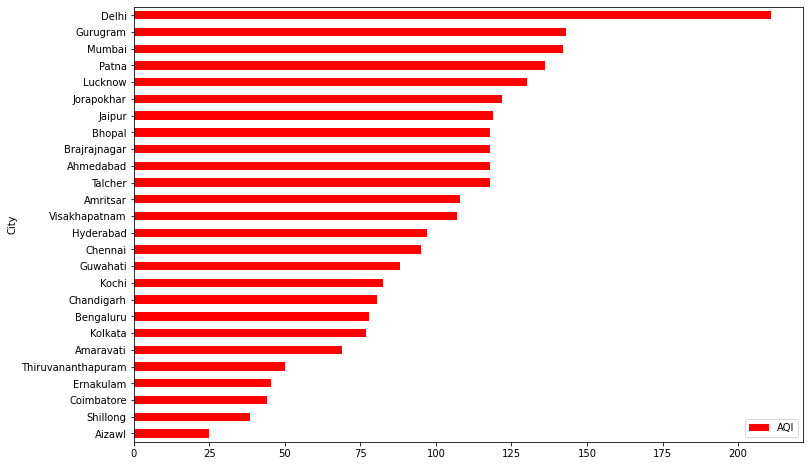

In [30]:
# 5- most polluted states
df[['AQI', 'City']].groupby(['City']).median().sort_values("AQI", ascending = True).plot.barh(color="r",figsize=(12,8))


Hence, it can be concluded that most (5)polluted states are:
1. Delhi
2. Gurugram
3. Mumbai
4. Patna
5. Lucknow

<AxesSubplot:ylabel='City'>

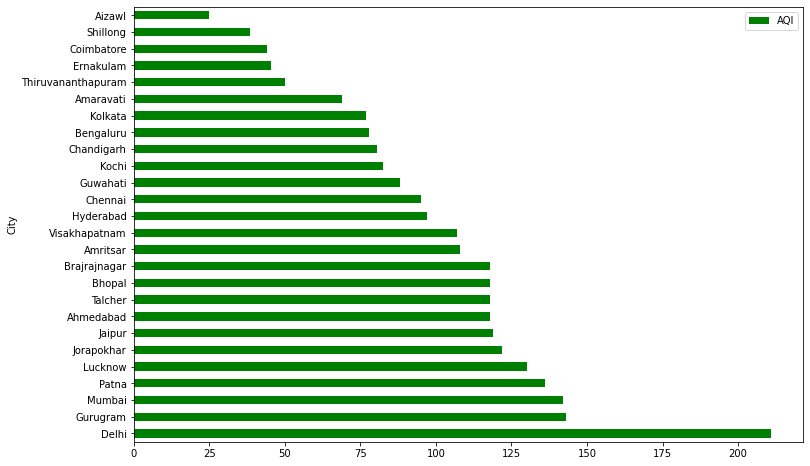

In [31]:
# 5 cleanest City
df[['AQI', 'City']].groupby(['City']).median().sort_values("AQI", ascending = False).plot.barh(color="g",figsize=(12,8))


Top 5 Cities with clean air:
1. Aizwal
2. Shillong
3. Coimbatore
4. Ernakulam
5. Thiruvanthapuram

<AxesSubplot:xlabel='City'>

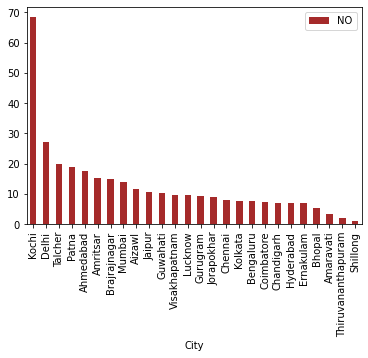

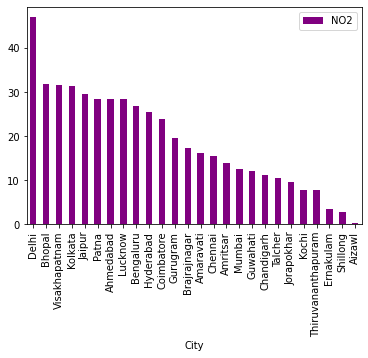

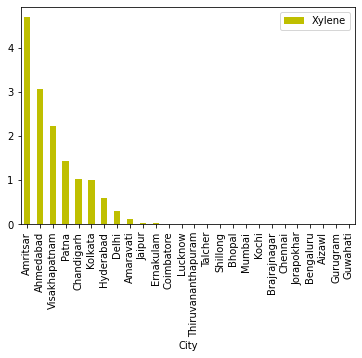

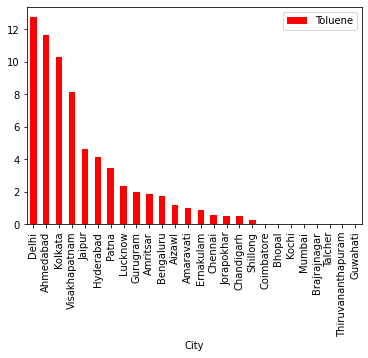

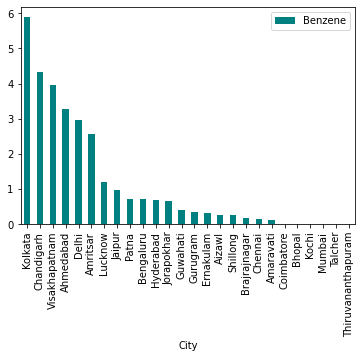

In [32]:
 # Considering the pollutant not used during AQI calculation
df[['NO', 'City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='brown')
df[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='purple')
df[['Xylene', 'City']].groupby(['City']).median().sort_values("Xylene", ascending = False).plot.bar(color='y')
df[['Toluene', 'City']].groupby(['City']).median().sort_values("Toluene", ascending = False).plot.bar(color='r')
df[['Benzene', 'City']].groupby(['City']).median().sort_values("Benzene", ascending = False).plot.bar(color='teal')

# conclusion:
From the above graph, it can be clearly seen that these factors were not used to calculate AQI but still this is affecting the cities to a great extent and the metropolitian capital city are more polluted as compare to other cities.

# Model to give AQI_bucket with health impact

In [148]:
# importing the file created alreday
from aqi import AQI

In [149]:
output=AQI

In [151]:
AQI=int(input("Enter AQI: "))
output.AQI_bucket(AQI)

Enter AQI: 120


'AQI_bucket=Moderate, May cause breathing discomfort to people with lung disease such as asthma, and discomfort to people with heart disease, children and older adults. It is advised to wear mask for the sensitive people.'

# Machine Learning Model

Algorithms are the methods to solve an objective of the datset. Machine learning models are able to evaluate future unknown data and make predictions or future insights. Therefore,which model to deploy depends upon our dataset and objective. 

We can apply few types of algorithm to get the result:
1. Time Series(Most appropriate,since it includes date)
2. Random Forest Regression.

## Random Forest
-Prepare your dataset

In [33]:
# encoding the whole dateset into numerical form
encoder=preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0],str):
        df[i]=encoder.fit_transform(df[i])

In [34]:
df=df.drop(["AQI_bucket"],axis=1)   #since,this is dependent upon AQI
x=df.drop(["AQI"],axis=1)   #preparing independent variables
x

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
Date,,,,,,,,,,,,,
2015-01-01,0,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00
2015-01-01,4,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07
2015-01-01,8,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00
2015-01-01,10,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84
2015-01-01,19,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,21,35.42,57.82,44.50,31.15,57.72,1.14,0.82,3.99,25.76,1.73,5.50,2.14
2020-07-01,22,16.70,29.40,0.97,2.70,1.04,2.66,0.10,4.29,17.71,0.00,0.02,0.00
2020-07-01,23,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,0.00,0.00


In [35]:
y=df["AQI"]       # dependent variable

In [36]:
# Splitting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
# Fitting algorithm
regressor = RandomForestRegressor(max_depth=3,min_samples_split=5,n_estimators=70,max_leaf_nodes=6)   #hypertuned by fixing leaf nodes: by deafault it is none
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, max_leaf_nodes=6, min_samples_split=5,
                      n_estimators=70)

In [38]:
#predicton from the model
y_pred=regressor.predict(x_test)

In [39]:
regressor.score(x_test,y_test) #check th score of the model

0.8496433031724827

# RMSE
Calculating the rmse of our data set, to know about our model.

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

34.611538863036195

To know, whether RMSE is good or not, we need to be aware about the range of our test data.

In [42]:
y.max()

1000.0

In [43]:
y.min()

8.0

In [44]:
y.describe()

count    29531.000000
mean       130.099048
std         86.522079
min          8.000000
25%         71.000000
50%        113.000000
75%        161.000000
max       1000.000000
Name: AQI, dtype: float64

Hence, we can see RMSE is smaller than the range.So, the model is not bad.

# Time Series

In [45]:
df.head(5)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015-01-01,0,25.34,137.84,0.92,18.22,17.15,10.06,0.92,27.64,133.36,0.00,0.02,0.00,138.0
2015-01-01,4,33.95,37.71,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,0.07,38.0
2015-01-01,8,34.20,58.70,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,0.00,0.00,59.0
2015-01-01,10,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,608.0
2015-01-01,19,58.73,63.99,2.11,13.46,4.57,9.49,12.15,169.57,25.92,1.35,3.93,0.00,170.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  int32  
 1   PM2.5    29531 non-null  float64
 2   PM10     29531 non-null  float64
 3   NO       29531 non-null  float64
 4   NO2      29531 non-null  float64
 5   NOx      29531 non-null  float64
 6   NH3      29531 non-null  float64
 7   CO       29531 non-null  float64
 8   SO2      29531 non-null  float64
 9   O3       29531 non-null  float64
 10  Benzene  29531 non-null  float64
 11  Toluene  29531 non-null  float64
 12  Xylene   29531 non-null  float64
 13  AQI      29531 non-null  float64
dtypes: float64(13), int32(1)
memory usage: 3.3 MB


In [47]:
dc=df.drop(df.iloc[:,0:13],axis = 1)
dc

,AQI
Date,
2015-01-01,138.0
2015-01-01,38.0
2015-01-01,59.0
2015-01-01,608.0
2015-01-01,170.0
...,...
2020-07-01,58.0
2020-07-01,29.0
2020-07-01,57.0


In [53]:
df=dc.resample(rule="MS").sum()

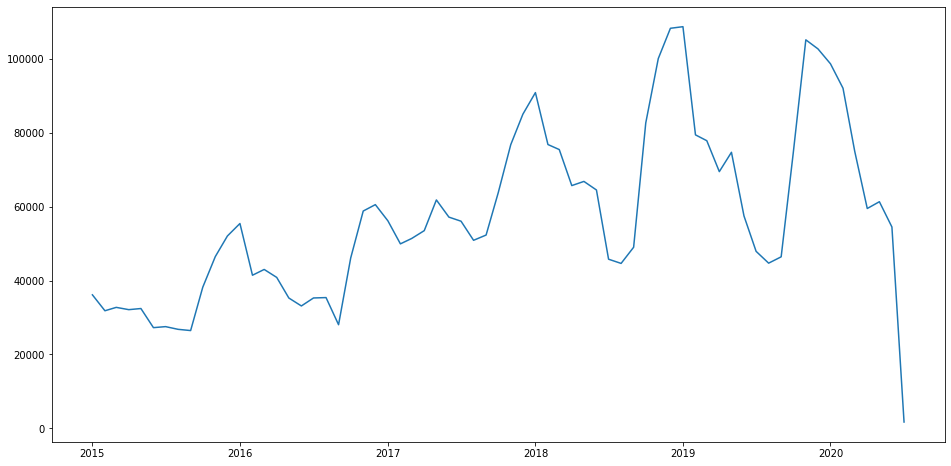

In [54]:
plt.figure(figsize=(16,8))
plt.plot(df)

In [68]:
# Check for Stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(x):
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    if dftest[1] <= 0.05:
        print("We reject the null hypothesis; it is stationary.")
    else:
        print("We accept the null hypothesis; it is seasonal.")

In [69]:
# calling function---> statistical test to check stationarity
adf_test(df["AQI"])

Test Statistic                 -1.938493
p-value                         0.314175
#Lags Used                      9.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64
We accept the null hypothesis; it is seasonal.


## Differencing

In [88]:
df["First_difference"]=df["AQI"]-df["AQI"].shift(1) 

In [89]:
df.head(14)

,AQI,First difference,First_difference
Date,,,
2015-01-01,36144.0,NaN,NaN
2015-02-01,31833.0,NaN,-4311.0
2015-03-01,32751.0,NaN,918.0
2015-04-01,32133.0,NaN,-618.0
2015-05-01,32438.0,NaN,305.0
2015-06-01,27260.0,NaN,-5178.0
2015-07-01,27538.0,NaN,278.0
2015-08-01,26805.0,NaN,-733.0
2015-09-01,26472.0,NaN,-333.0


In [90]:
#Again, test the p-value
adf_test(df["First_difference"].dropna())

Test Statistic                -7.379388e+00
p-value                        8.551878e-11
#Lags Used                     8.000000e+00
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64
We reject the null hypothesis; it is stationary.


<AxesSubplot:xlabel='Date'>

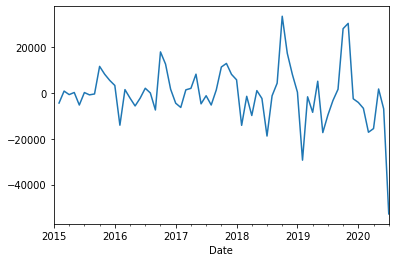

In [91]:
df["First_difference"].plot()

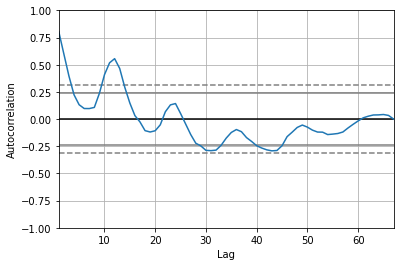

In [93]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["AQI"])
plt.show()

In [102]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm



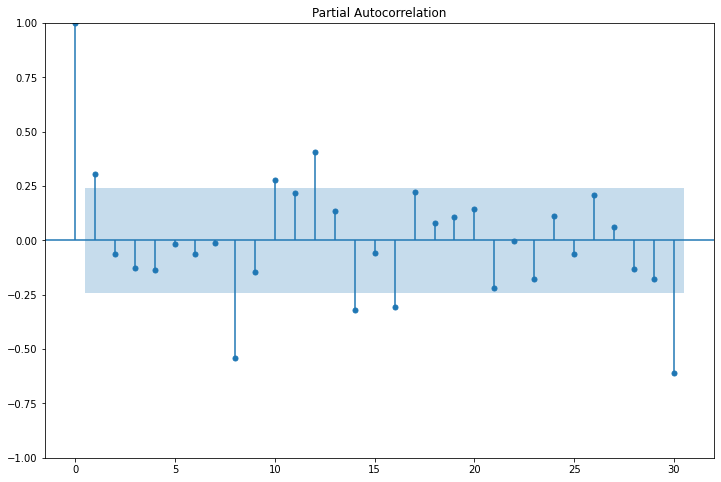

In [104]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(111)
fig=sm.graphics.tsa.plot_pacf(df["First_difference"].dropna(),lags=30,ax=ax1)

In the above, it comes down at 2, so p is 2 i.e AR=2

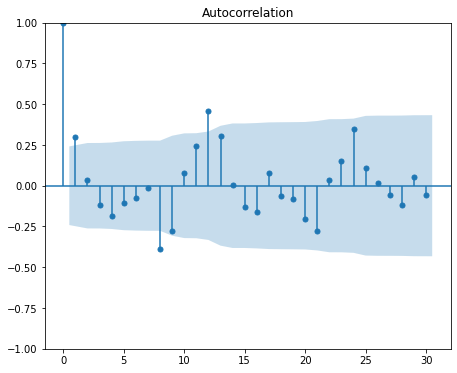

In [111]:
fig=plt.figure(figsize=(16,6))
ax2=fig.add_subplot(121)
fig=sm.graphics.tsa.plot_acf(df["First_difference"].dropna(),lags=30,ax=ax2)


In [153]:
auto_arima(y=df["AQI"],start_p=1,start_P=1,start_q=1,start_Q=1, seasonal=True, m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -572.993
Date:                            Tue, 04 Jan 2022   AIC                           1149.986
Time:                                    05:46:36   BIC                           1153.964
Sample:                                         0   HQIC                          1151.520
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3716      0.116     -3.193      0.001      -0.600      -0.143
sigma2       9.84e+07   3.11e-10   3.16e+17      0.000    9.84e+07    9.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                34.14
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -1.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [154]:
# split it into train and test data
train = df["AQI"][:2018-12]
test = df["AQI"][2018-12:]

In [156]:
from statsmodels.tsa.statespace import sarimax


In [180]:
model=sarimax.SARIMAX(train,order=(0,1,0),seasonal_order=(1,1,0,12),trend="n")
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   67
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -572.993
Date:                            Tue, 04 Jan 2022   AIC                           1149.986
Time:                                    11:58:17   BIC                           1153.964
Sample:                                01-01-2015   HQIC                          1151.520
                                     - 07-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3716      0.116     -3.193      0.001      -0.600      -0.143
sigma2       9.84e+07   3.11e-10   3.16e+17      0.000    9.84e+07    9.84e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                34.14
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               3.25   Skew:                            -1.06
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

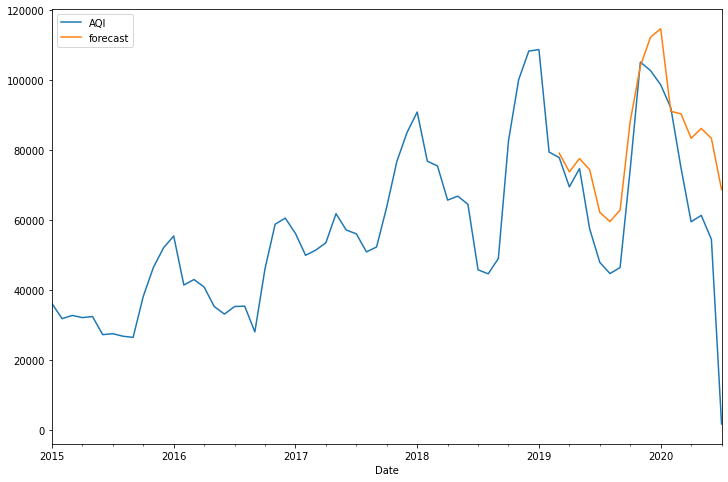

In [181]:
df["forecast"]=result.predict(start=50,end=100,dynamic=True)
df[["AQI","forecast"]].plot(figsize=(12,8))

In [175]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100